<a href="https://colab.research.google.com/github/SWASTIK-CHAMOLA/College-AI-ML-LAB/blob/main/LAB8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#lab 8: Exploration of the dataset for Regression task.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Initial Shape: (7789, 11)

Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

Dataset after cleaning: (7789, 13)

Summary Statistics (Numerical Columns):
       Release_Year  Duration_num
count   7691.000000   7789.000000
mean    2018.507476    101.549621
std        1.382141     58.402857
min     2008.000000      3.000000
25%     2018.000000     60.000000
50%     2019.000000     94.000000
75%     2020.000000    118.000000
max     2021.000000    960.000000


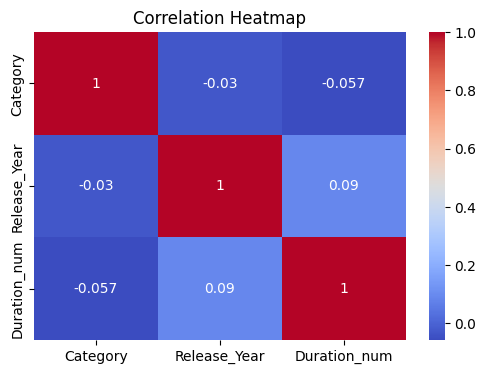

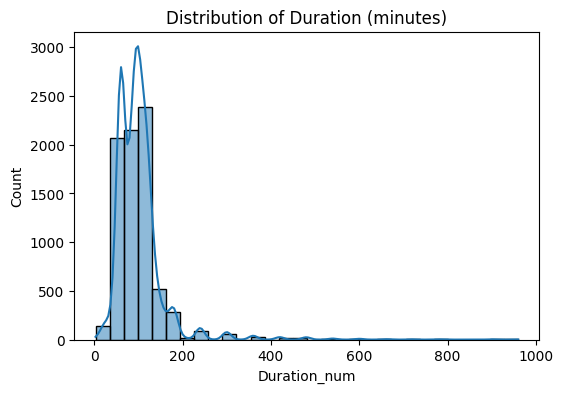

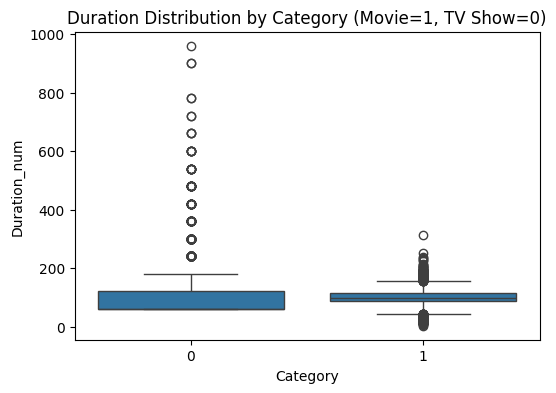

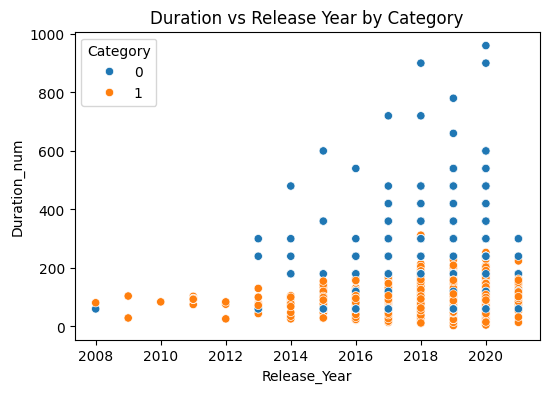


Insights for Regression Task:
- 'Duration_num' is a continuous variable suitable as a regression target.
- 'Release_Year' and 'Category' can act as independent variables.
- There is slight variation in duration across release years, more consistent for Movies.
- Data cleaning ensured valid numeric representation for duration.


In [8]:
# Lab 8: Exploration of the Dataset for Regression Task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# -------------------------------
# Step 1: Load Dataset
# -------------------------------
file_path = "/content/drive/MyDrive/Colab Notebooks/Netflix Dataset.csv"
df = pd.read_csv(file_path)

print("Initial Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

# -------------------------------
# Step 2: Data Cleaning
# -------------------------------
# Convert Category to numerical: Movie=1, TV Show=0
df['Category'] = df['Category'].map({'Movie': 1, 'TV Show': 0})

# Convert Duration to numeric (in minutes)
def convert_duration(val):
    if "min" in str(val):
        return int(val.replace(" min", ""))
    elif "Season" in str(val):
        return int(val.split()[0]) * 60  # approximate conversion
    else:
        return np.nan

df['Duration_num'] = df['Duration'].apply(convert_duration)

# Drop missing Duration values
df = df.dropna(subset=['Duration_num'])

# ✅ Extract release year from Release_Date
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Release_Year'] = df['Release_Date'].dt.year

print("\nDataset after cleaning:", df.shape)

# -------------------------------
# Step 3: Basic Statistics
# -------------------------------
print("\nSummary Statistics (Numerical Columns):")
print(df[['Release_Year', 'Duration_num']].describe())

# -------------------------------
# Step 4: Correlation Analysis
# -------------------------------
plt.figure(figsize=(6,4))
sns.heatmap(df[['Category', 'Release_Year', 'Duration_num']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# -------------------------------
# Step 5: Visualizing Distributions
# -------------------------------
plt.figure(figsize=(6,4))
sns.histplot(df['Duration_num'], bins=30, kde=True)
plt.title("Distribution of Duration (minutes)")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Category', y='Duration_num', data=df)
plt.title("Duration Distribution by Category (Movie=1, TV Show=0)")
plt.show()

# -------------------------------
# Step 6: Relationship Analysis
# -------------------------------
plt.figure(figsize=(6,4))
sns.scatterplot(x='Release_Year', y='Duration_num', hue='Category', data=df)
plt.title("Duration vs Release Year by Category")
plt.show()

# -------------------------------
# Step 7: Insights for Regression
# -------------------------------
print("\nInsights for Regression Task:")
print("- 'Duration_num' is a continuous variable suitable as a regression target.")
print("- 'Release_Year' and 'Category' can act as independent variables.")
print("- There is slight variation in duration across release years, more consistent for Movies.")
print("- Data cleaning ensured valid numeric representation for duration.")
